#   EE 521 DSP Lab 

##  Assignment-5 | AVI KHANDELWAL, 204102301 

## Importing packages -

In [1]:
from numpy import sin,cos,pi
import numpy as np
import matplotlib.pyplot as plt
import math as m
import warnings
import cmath
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import patches


warnings.filterwarnings('ignore')

def DFT(x):
  N = len(x)
  X = np.zeros(N,dtype=np.complex_)
  for k in range(N):
    for n in range(N):
      X[k] += x[n]*np.exp(-1j*(2*pi/N)*n*k)
  return X
  
def IDFT(X):
  N = len(X)
  x = np.zeros(N,dtype=np.complex_)
  for n in range(N):
    for k in range(N):
      x[n] += 1/N*(X[k]*np.exp(1j*(2*pi/N)*n*k))
    x[n] = round(x[n],5)
  return x

### 1. Consider a periodic square wave with time period T = 2 seconds having magnitude 1 between t = 0 s and t = 1 s and zero elsewhere. Let g(t) be the Fourier series representation of the square wave.

#### (a) Define a function so that you can easily plot g(t) for different numbers of coefficients on the same graph. This plot is useful to see the emergence of the square wave as the number of terms in the representation increases.


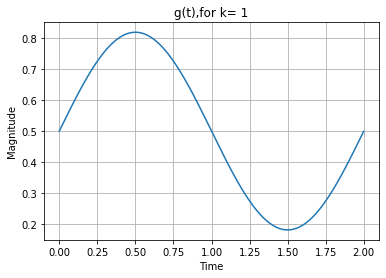

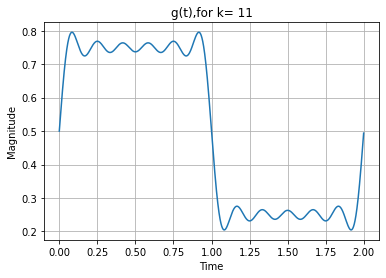

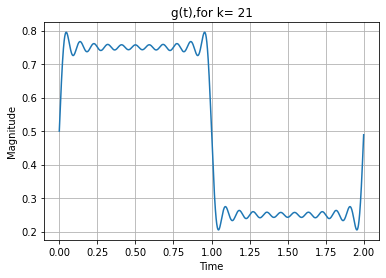

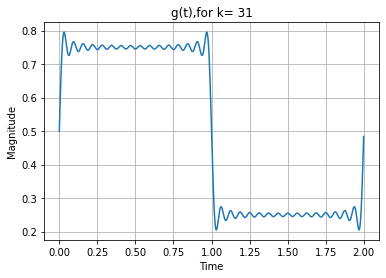

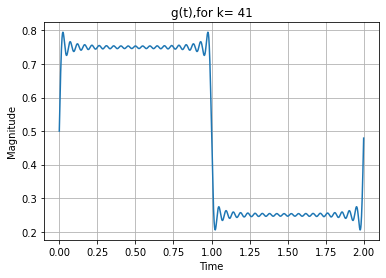

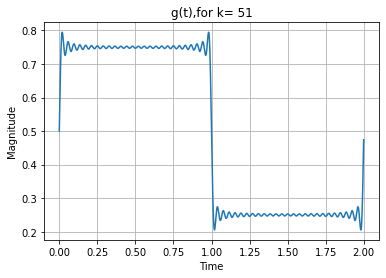

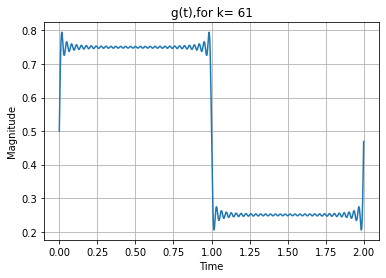

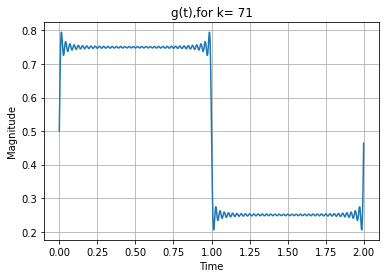

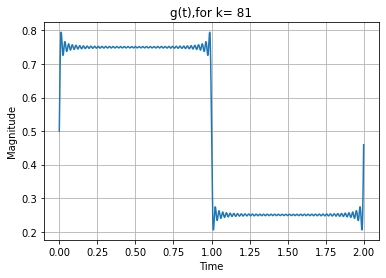

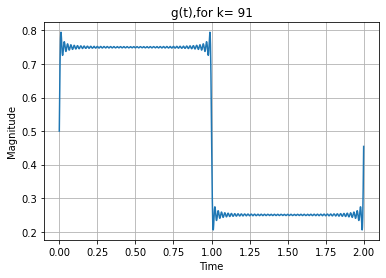

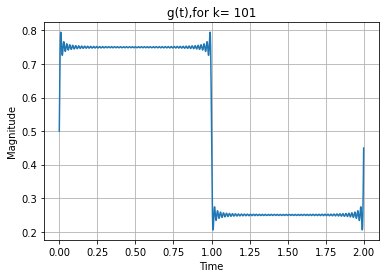

In [ ]:
def plot_g(p):
  t = np.arange(0,2,0.001)
  g = 0.5 # DC term
  for k in range(1,p+1):
    a = (np.exp(-1j*k*pi/2)/(k*pi))*sin(k*pi/2)
    g += a*(np.exp(1j*k*pi*t))
  plt.figure()
  plt.grid()
  plt.title("g(t),for k= %d"%p)
  plt.xlabel("Time")
  plt.ylabel("Magnitude")
  plt.plot(t,g)

for i in range(0,101,10):
  plot_g(i+1)



### (b) What happens to the Gibbs phenomenon when the number of terms becomes large?

#### When the number of terms become large, ringing keeps on reducing but the overshoot does not die out as n increases but rather approaches a finite limit. Since a signal with discontinuity in the time domain requires infinite frequency content for reperesentaton, it is not possible to sample infinite frequency content and hence overshoot persists which is called the “Gibbs phenomenon”.

### 2. A signal is given as x(t) = cos2πf t where f = 30 Hz. The signal is sampled at 100 times per second for 0.99 seconds and then its DFT is computed.
### (a) Plot the power spectral density and visualize the Spectral Leakage.


Text(0.5, 1.0, 'Power spectrum')

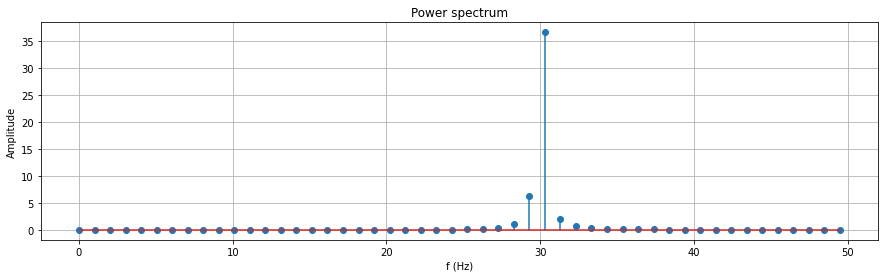

In [20]:
Fs = 100
T = 1/Fs
N = 99     
n = np.arange(0,N*T,T)
F = np.arange(0,Fs/2,Fs/N)
f = 30 
x  = cos(2*pi*f*n)
X = DFT(x)
X = X[:50]
p = (abs(X)**2)/50

plt.figure(figsize=(15,4))
plt.stem(F,p)
plt.grid()
plt.xlabel('f (Hz)')
plt.ylabel('Amplitude')
plt.title('Power spectrum')

### Imperfect sampling creates new frequency components which can be referred to as "spectral leakage" 

#### (b) Using various window functions such as Hanning, Hamming, Bartlett etc. try to minimize the Spectral Leakage. Show the plots in each case.

#### 1. Hanning Window

Text(0.5, 1.0, 'Power spectrum after applying hanning window')

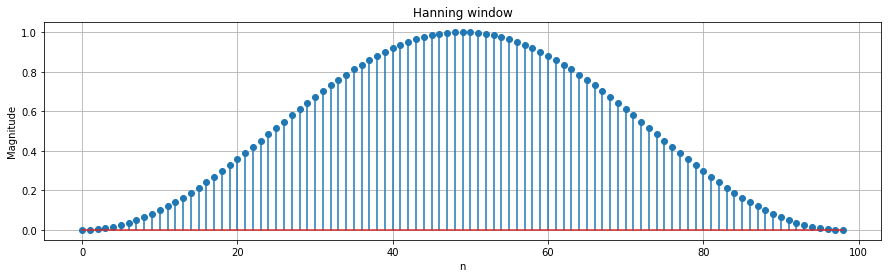

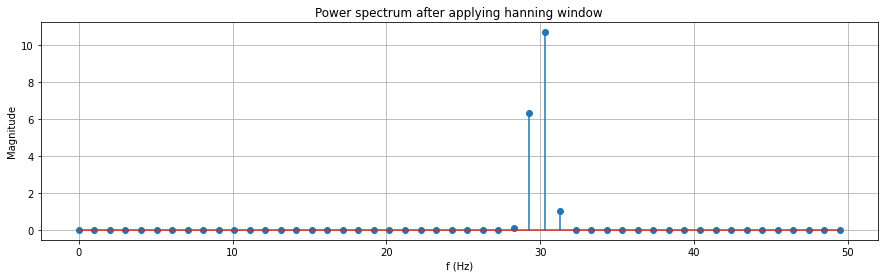

In [27]:
x  = cos(2*pi*f*n)
hann_array = np.zeros(N)
for i in range(N):
  hann_array[i] = 0.5 - (0.5*cos((2 * pi * i) / (N - 1)))

plt.figure(1,figsize=(15,4))
plt.stem(hann_array)
plt.grid()
plt.xlabel('n')
plt.ylabel('Magnitude')
plt.title('Hanning window')

x1 = x*hann_array

X1 = DFT(x1)[:50]
p1 = (abs(X1)**2)/50

plt.figure(2,figsize=(15,4))
plt.stem(F,p1)
plt.grid()
plt.xlabel('f (Hz)')
plt.ylabel('Magnitude')
plt.title('Power spectrum after applying hanning window')



#### 2. Hamming Window


Text(0.5, 1.0, 'Power spectrum after applying hamming window')

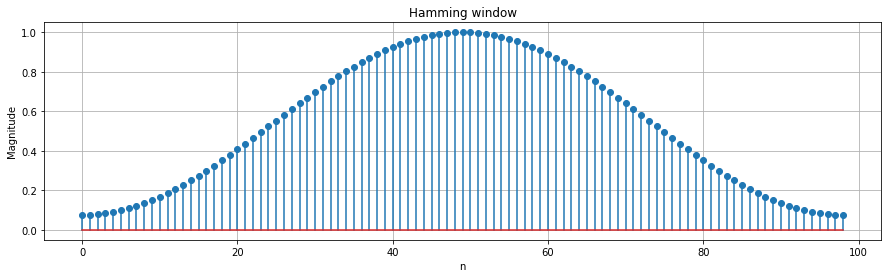

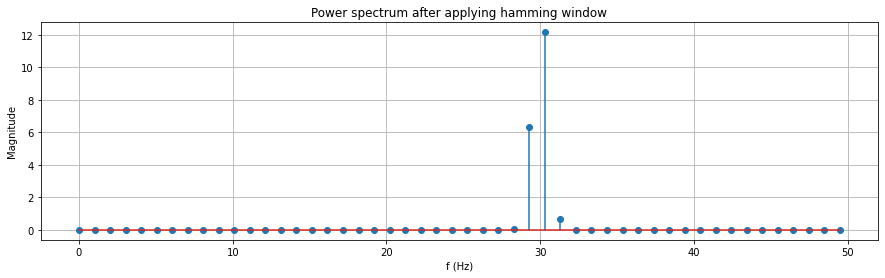

In [26]:
x  = cos(2*pi*f*n)
ham_array = np.zeros(N)
for i in range(N):
  ham_array[i] = 0.53836 - 0.46164 * cos((2 * pi * i) / (N - 1))

plt.figure(1,figsize=(15,4))
plt.stem(ham_array)
plt.grid()
plt.xlabel('n')
plt.ylabel('Magnitude')
plt.title('Hamming window')

x1 = x*ham_array

X1 = DFT(x1)[:50]
p1 = (abs(X1)**2)/50

plt.figure(2,figsize=(15,4))
plt.stem(F,p1)
plt.grid()
plt.xlabel('f (Hz)')
plt.ylabel('Magnitude')
plt.title('Power spectrum after applying hamming window')

#### 3. Barlett Window

Text(0.5, 1.0, 'Power spectrum after applying Barlett window')

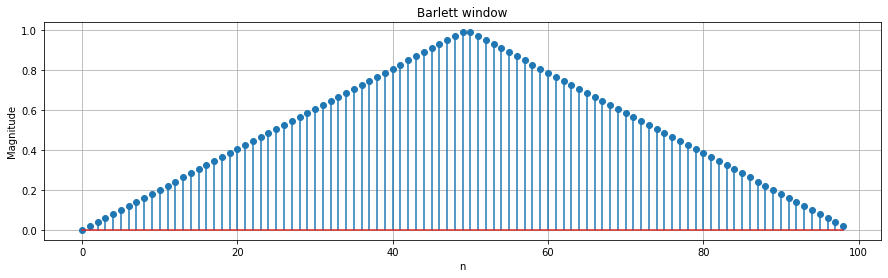

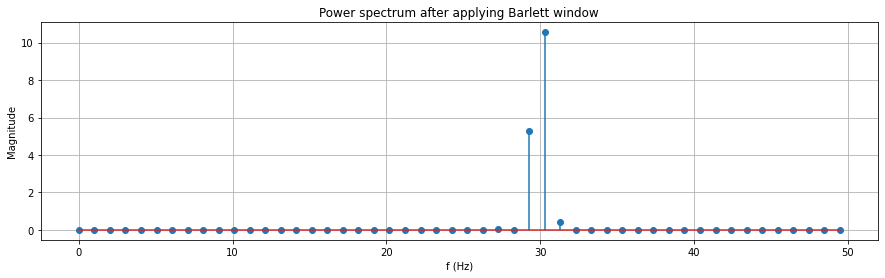

In [25]:
x  = cos(2*pi*f*n)
bar_array = np.zeros(N)

for i in range(50):
  bar_array[i] = 2*i/N
for i in range(50,N):
  bar_array[i] = 2 - 2*i/N

plt.figure(1,figsize=(15,4))
plt.stem(bar_array)
plt.grid()
plt.xlabel('n')
plt.ylabel('Magnitude')
plt.title('Barlett window')

x1 = x*bar_array

X1 = DFT(x1)[:50]
p1 = (abs(X1)**2)/50

plt.figure(2,figsize=(15,4))
plt.stem(F,p1)
plt.grid()
plt.xlabel('f (Hz)')
plt.ylabel('Magnitude')
plt.title('Power spectrum after applying Barlett window')

#### 4. Blackman Window

Text(0.5, 1.0, 'Power spectrum after applying Blackman window')

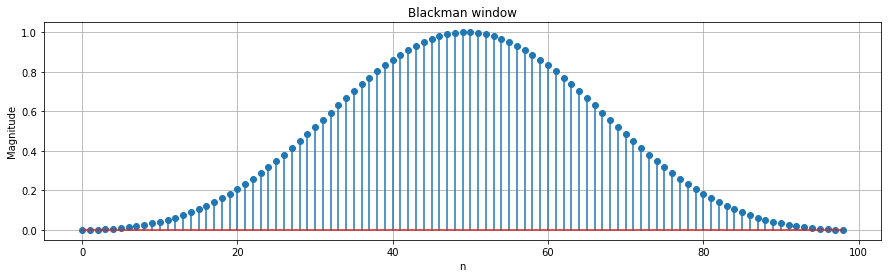

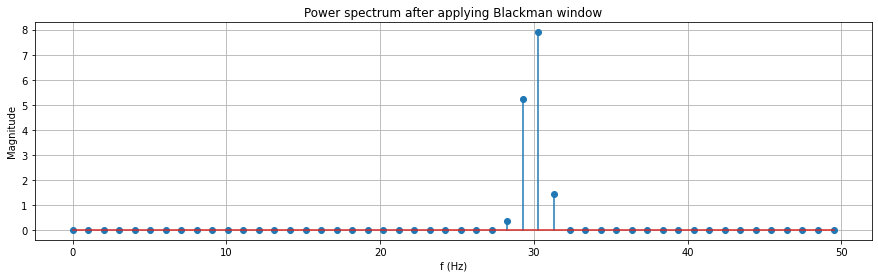

In [29]:
x  = cos(2*pi*f*n)
black_array = np.zeros(N)

for i in range(N):
  black_array[i] = 0.42 - 0.5*cos(2*pi*i/N) + 0.08*cos(4*pi*i/N)

plt.figure(1,figsize=(15,4))
plt.stem(black_array)
plt.grid()
plt.xlabel('n')
plt.ylabel('Magnitude')
plt.title('Blackman window')

x1 = x*black_array

X1 = DFT(x1)[:50]
p1 = (abs(X1)**2)/50

plt.figure(2,figsize=(15,4))
plt.stem(F,p1)
plt.grid()
plt.xlabel('f (Hz)')
plt.ylabel('Magnitude')
plt.title('Power spectrum after applying Blackman window')

#### 3. Consider the signal x(t) = cos(2πf1t) + cos(2πf2t) where f1 = 10 Hz and f2 = 30 Hz. The signal y(t) is the noisy version of x(t) when x(t) is corrupted with white noise having zero mean and unit variance.


#### (a) Find the power spectral density of y(t) and show a labelled plot.


<StemContainer object of 3 artists>

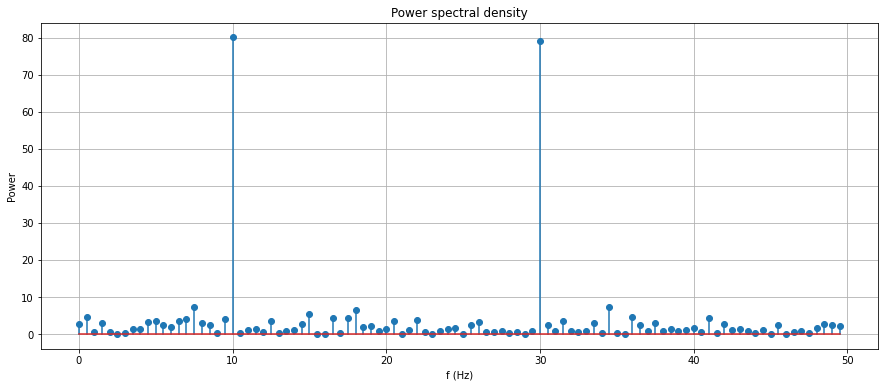

In [34]:
f1 = 10
f2 = 30
t = np.arange(0,2,0.01) # Fs = 100 Hz, so upto 50 Hz frequency can be represented  
# Total 200 sample points will be there
x = cos(2*pi*f1*t) + cos(2*pi*f2*t)
samples_white = np.random.normal(0, 1, size=200) # Total 200 noise sample points 
y = x + samples_white
Y = DFT(y)
m = abs(Y)**2

plt.figure(figsize=(15,6))
plt.grid()
plt.xlabel('f (Hz)')
plt.ylabel('Power')
plt.title('Power spectral density')

F = np.arange(0,50,0.5) # Frequency points
plt.stem(F,m[:100]/100) # Only considering 1 SSB 

#### (b) From the PSD, find a suitable threshold for denoising the signal.



<StemContainer object of 3 artists>

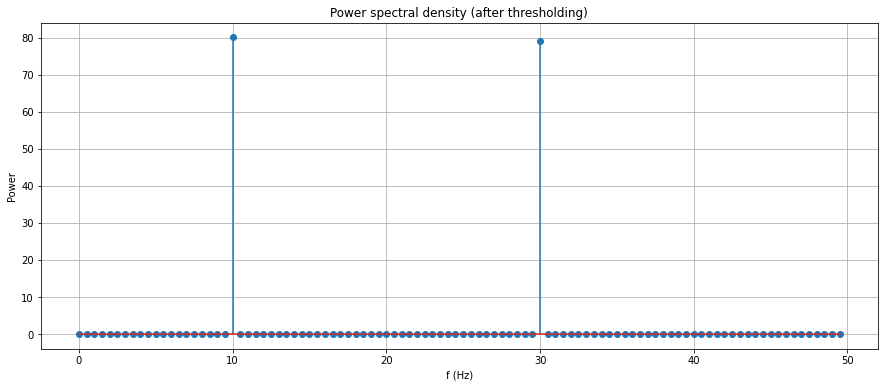

In [36]:
# Choosing the threshold as 20
for i in range(len(Y)):
  if (abs(Y[i])**2)/200 < 20:
    Y[i] = 0

m = abs(Y)**2

plt.figure(figsize=(15,6))
plt.grid()
plt.xlabel('f (Hz)')
plt.ylabel('Power')
plt.title('Power spectral density (after thresholding)')

F = np.arange(0,50,0.5) # Frequency points
plt.stem(F,m[:100]/100) # Only considering 1 SSB 

#### (c) Recover x(t) from y(t) using the threshold. Show the necessary plots.

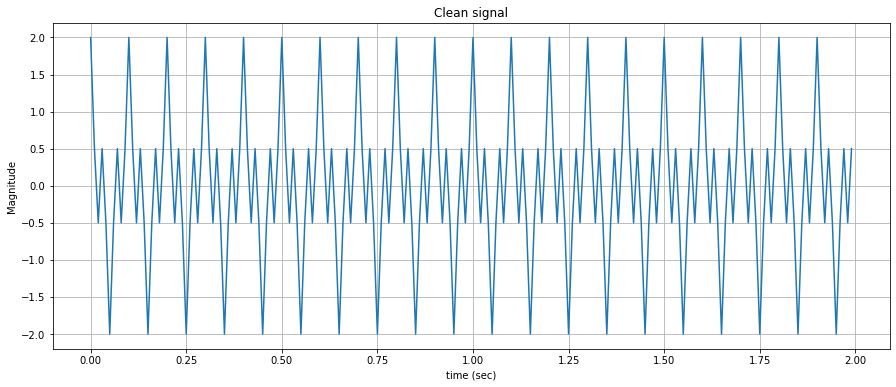

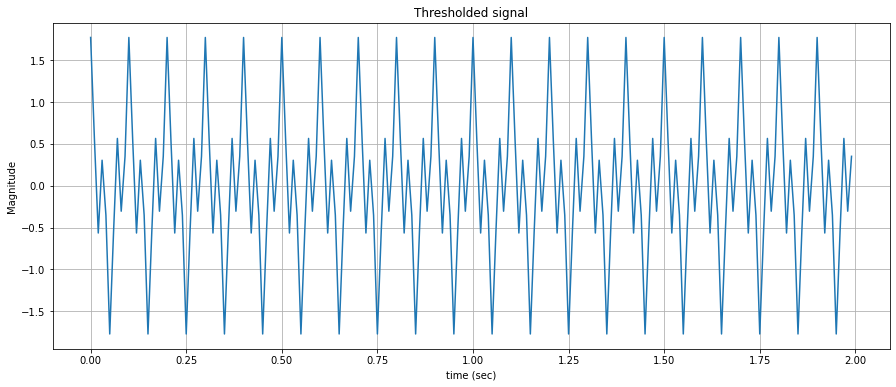

In [37]:
y1 = IDFT(Y) # Noisy signal after thresholding
y = cos(2*pi*f1*t) + cos(2*pi*f2*t) # Clean signal

plt.figure(1,figsize=(15,6))
plt.grid()
plt.xlabel('time (sec)')
plt.ylabel('Magnitude')
plt.title('Clean signal')
plt.plot(t,y)

plt.figure(2,figsize=(15,6))
plt.grid()
plt.xlabel('time (sec)')
plt.ylabel('Magnitude')
plt.title('Thresholded signal')
plt.plot(t,y1)